#  Distribution of the Information Density of Gaussian Random Vectors
## Example Notebook:
This Jupyter notebook serves as an example what the finite sum approximation can be used for.
Every section below contains an appropriate example on how to calculate/plto specific use cases.

## General Imports:
Import the minimal modules to work. These are needed for all of the examples below.

In [1]:
# import the algorithm
from gaussian import *

# import packages for math and plotting
import numpy as np
import matplotlib.pyplot as plt

# change the matplotlib plotting theme (Not required in general)
plt.style.use('./mp_style/infth.mplstyle')

## Calculate and Display the PDF of the Information Density
Example: Calculate only the pdf with a vector of different canonical correlations.

### Simulation Settings:

In [2]:
## simulation settings
max_err = 1e-3  # maximum allowed error (Note: the minimum error achivable here is limited by the machine EPS)

# List of Canonical Correlations (order and multiplicity doesn't matter!)
rho_vec = [.9, .4,.3, .2]
       
# Intervall Settings (Where to Calculate the PDF)
xmin = -5.0      
xmax = 5.0
points = 10_000


### Approximation of the PDF:

In [3]:

## Preparations
# generate the x vector
x = np.linspace(xmin, xmax, points)

# Initialize the Wrapper Class
gi = GaussianInf(rho_vec, max_err=max_err, center=False)

# Calculate the PDF at every point x
pdf = gi.pdf(x)

INFO: >> ccr= [0.2 0.3 0.4 0.9]
INFO: >> generating delta_k ...
INFO: |> pdf_error=9.71602e-04, cdf_error=6.05444e-03, iterations needed: 76
INFO: >> calculate pdf ...
INFO: |> special function lookup ...


### Plot the Results:

In [4]:
# Generate a simple Legend
leg = ""
for i, rho in enumerate(gi.ccr):
    if i==0:
        pass
    else:
        leg +=", "
    leg += "$\\rho_{:d}$={:.2f}".format(i+1,rho)
    # Display the PDF
    
# plot the information density against x
plt.plot(x, pdf)

# Change the Labels
plt.xlabel("$x$")
plt.ylabel("$f_{i(\\xi;\\eta)-I(\\xi;\\eta)}(x)$")

# Plot the legend
plt.legend([leg], loc=2)

# display the plot
plt.show()

## Calculate and Display the CDF of the Information Density
Example: Only Calculate the CDF of the Information Density and plot the result.

### Simulation Settings:

In [5]:
## simulation settings
max_err = 1e-3  # maximum allowed error (Note: the minimum error achivable here is limited by the machine EPS)

# List of Canonical Correlations (order and multiplicity doesn't matter!)
rho_vec = [.9, .4,.3, .2]
       
# Intervall Settings (Where to Calculate the PDF)
xmin = -5.0      
xmax = 5.0
points = 10_000


### Approximation of the CDF:

In [6]:
## Preparations
# generate the x vector
x = np.linspace(xmin, xmax, points)

# Initialize the Wrapper Class
gi = GaussianInf(rho_vec, max_err=max_err, center=False)

## Calculate the CDF at every point in x
# Depending on the Settings this might take some time!
cdf =gi.cdf(x)

INFO: >> ccr= [0.2 0.3 0.4 0.9]
INFO: >> calculate cdf ...
INFO: |> special function lookup ...
INFO: >> generating delta_k ...
INFO: |> pdf_error=1.30751e-04, cdf_error=9.73351e-04, iterations needed: 109


### Plot the Results:

In [7]:
# plot the CDF
plt.plot(x, cdf)
# Change the Labels
plt.xlabel("$x$")
plt.ylabel("$F_{i(\\xi;\\eta)-I(\\xi;\\eta)}(x)$")

# Plot the Legend
plt.legend([leg], loc=2)

# Display the plot
plt.show()

## Monte-Carlo PDF Simulation and Comparision to the finite sum Approximation:
In this example the finite sum approximation of the PDF of the inromatin density is compared against a monte carlo simulation.

### Simulation Settings:

In [60]:
## Simulation settings
# settings for the monte carlo distribution
# samples used for the monte-carlo approximation
samples = 10_000 
# number of bins (for plotting with matplotlib)
bins = 100    

# settings for the finite sum approximation of the PDF
max_err = 1e-3  # maximum allowed error (Note: the minimum error achivable here is limited by the machine EPS)

# List of Canonical Correlations (order and multiplicity doesn't matter!)
rho_vec = [.9, .4,.3, .2]
       
# Intervall Settings (Where to Calculate the PDF)
xmin = -5.0      
xmax = 5.0
points = 10_000

In [61]:
# generate the approximated information density
x1, pdf_mc = gi.monte_carlo_pdf(x=x, samples=samples, bins=100)

# finite sum approximation
pdf = gi.pdf(x)

INFO: >> generating delta_k ...
INFO: |> pdf_error=9.71602e-04, cdf_error=6.05444e-03, iterations needed: 76
INFO: >> calculate pdf ...
INFO: |> special function lookup ...


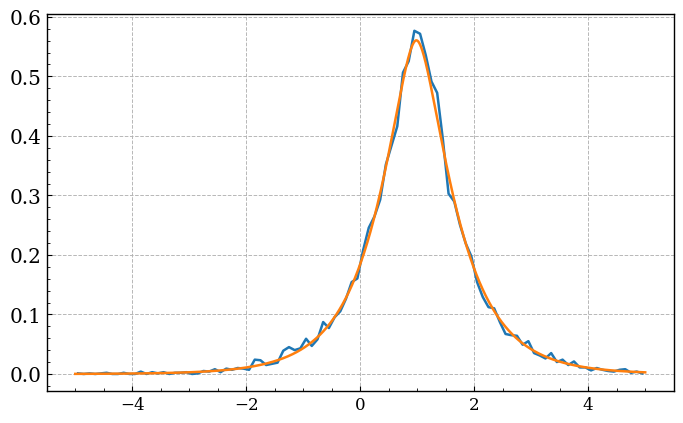

In [62]:
# plot the simulated information density
#plt.hist(pdf_mc, bins=bins, density=True)

plt.plot(x1, pdf_mc)


# plot the approximated information density
plt.plot(x, pdf)

plt.show()

## Monte-Carlo CDF Simulation and Comparision to the finite sum Approximation:

In [63]:
x1, mc_cdf=gi.monte_carlo_cdf(x=x, samples=samples, bins=bins)
cdf = gi.cdf(x)

INFO: >> calculate cdf ...
INFO: |> special function lookup ...
INFO: >> generating delta_k ...
INFO: |> pdf_error=1.30751e-04, cdf_error=9.73351e-04, iterations needed: 109


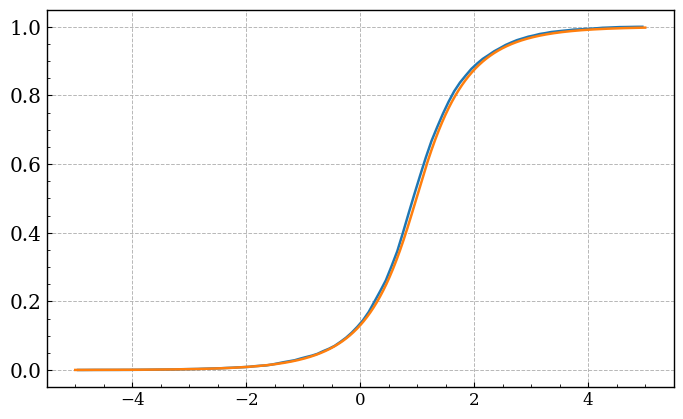

In [64]:
# plot the simulated information density
#plt.hist(mc_cdf, bins=bins, density=True)


plt.plot(x1, mc_cdf)
plt.plot(x, cdf)


plt.show()
        